# Importations à faire

In [2]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas #permettant la lecture des fichiers .csv
from mangaki.utils.values import rating_values

# Récupérations des données

In [3]:
ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

In [4]:
ratings



array([[784, 5471, 'neutral'],
       [943, 204, 'wontsee'],
       [883, 5852, 'willsee'],
       ..., 
       [703, 8092, 'like'],
       [493, 1028, 'like'],
       [945, 3143, 'like']], dtype=object)

In [5]:
works

array([[0, 'Dream Eater Merry'],
       [1, "Our Home's Fox Deity"],
       [2, 'Ai no Wakakusa Yama Monogatari'],
       ..., 
       [8344, 'Désir © MAX'],
       [8345, 'Corpse Princess'],
       [8346, 'Manga Jinbutsushi']], dtype=object)

In [6]:
svd =MangakiSVD(10)
ratings[:,0:2]

array([[784, 5471],
       [943, 204],
       [883, 5852],
       ..., 
       [703, 8092],
       [493, 1028],
       [945, 3143]], dtype=object)

In [7]:
X=ratings[:,0:2]


In [8]:
small=['favorite','dislike','neutral']
Y=[]
for rating in small:
    Y.append(rating_values[rating])
    
    
    

In [9]:
print (Y)


[4, -2, 0.1]


In [10]:
#en plus court
Y=[rating_values[rating] for rating in small]
print(Y)


[4, -2, 0.1]


In [11]:
Y=[rating_values[rating] for rating in ratings[:,2]]

In [12]:
 #x.shape pr taille ; 
#svd.fix
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)


In [13]:
svd.nb_works

8347

In [14]:
svd.fit(X,Y)


Computing M: (1710 × 8347)
fill and center matrix [1778 ms]
Shapes (1710, 10) (10,) (10, 8347)
factor matrix [26221 ms]


In [15]:
svd.sigma


array([ 132.10749733,  116.39414976,   89.48887503,   76.42873147,
         74.44549921,   68.60912175,   66.10403993,   63.46201791,
         62.28810469,   60.01435002])

<IPython.core.display.Javascript object>


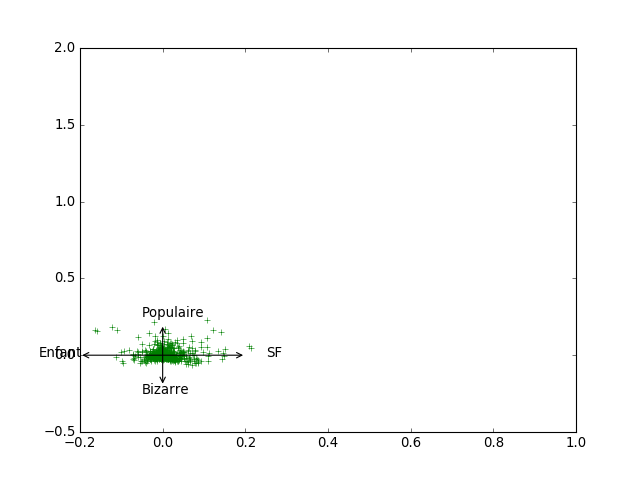

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()

In [17]:
#les flèches
plt.annotate('', xy=(0, 0.2), xytext=(0, -0.2),arrowprops={'arrowstyle': '<->'})
plt.annotate('', xy=(0.2, 0), xytext=(-0.2, 0),arrowprops={'arrowstyle': '<->'})


In [18]:
plt.plot([1],[2])

In [19]:
plt.text(-0.05, 0.25, 'Populaire')
plt.text(-0.05, -0.25, 'Bizarre')
plt.text(-0.3, -0.01, 'Enfant')
plt.text(0.25, -0.01, 'SF')

In [20]:
plt.plot(svd.VT[0,:],svd.VT[1,:],'+') #userprint


In [21]:
#plt.plot(svd.U[:,0],svd.U[:,1],'*')#anime

In [22]:
#ajout à partir d'ici depuis la dernière fois

In [23]:
svd.VT[0,:]


array([ -1.46911482e-03,  -1.61325672e-03,  -2.09351642e-04, ...,
        -8.23820414e-04,  -9.62902094e-06,  -4.14329142e-03])

In [24]:
svd.VT[1,:]


array([  3.62917972e-03,   7.07388194e-04,  -4.01041440e-04, ...,
         3.62074016e-04,  -7.24459333e-05,   6.00554583e-04])

In [25]:
svd.U[:,0]

array([  1.82026273e-03,   3.88068431e-02,  -1.78112571e-21, ...,
         2.36657233e-03,   7.50355175e-05,   2.74779308e-03])

In [26]:
svd.U[:,1]

array([  1.20576270e-02,  -8.76214721e-03,   4.67939789e-20, ...,
         7.20280522e-04,  -1.47003076e-03,   1.63212711e-04])

In [27]:
svd.U[0,:]

array([ 0.00182026,  0.01205763, -0.01771658,  0.01293524, -0.00290718,
       -0.01014336, -0.00522149,  0.02473159, -0.00197875, -0.025145  ])

In [28]:
svd.VT[0,:].max()


0.21267369810999712

In [29]:
svd.VT[0,:].argmax()



7088

In [30]:
works[svd.VT[0,:].argmax(),1]

'Princesse Mononoké'

In [31]:
A=[svd.VT[0,i] for i in range(0, nb_items)]
A





[-0.0014691148219831936,
 -0.0016132567210993525,
 -0.00020935164207912154,
 0.0007747949452770928,
 -0.0099610074080161964,
 -0.00064587811098129047,
 -0.00056632505502280999,
 -0.0021110129477851392,
 0.001093588096687828,
 7.6098813667070901e-07,
 0.0010083294881237867,
 -0.0017694049784111429,
 -5.4208733243326489e-05,
 3.460518072632232e-05,
 -0.00016635523760711966,
 0.00020234533097024759,
 -0.0058217719737354619,
 7.3993012480449245e-05,
 -5.0969250266794145e-05,
 -0.0001592128837886087,
 0.0059409076455780299,
 0.0041535489981465402,
 0.0010026652804418822,
 -0.00019499435200326487,
 0.0038132732664345657,
 0.0021096948850893278,
 0.0017015510689616156,
 -8.7976005867041512e-05,
 0.0019382043445898155,
 -0.0017685262527398784,
 -0.00064778476127055776,
 0.0021018994199254247,
 -0.00034619748917229937,
 -0.00078911321819876389,
 0.0002681695026621721,
 7.3993012480449245e-05,
 0.0023218207581404467,
 0.0011644232177128525,
 -0.00017403205078027367,
 -0.0004510761190549694,
 -8.

In [32]:
A.sort()

A[nb_items-1]
#liste=A[0,nb_items-31:]
B=svd.VT[0,:].tolist()
B.index(A[nb_items-1])
list_haut=[works[B.index(A[i]),1] for i in range(nb_items-30,nb_items)]
list_haut 
#affichage du top 30 du 1er vecteur ligne de svd.VT

['Neon Genesis Evangelion',
 'Barakamon',
 'Code Geass: Hangyaku no Lelouch R2',
 'Fate/Zero',
 'Mahou Shoujo Madoka★Magica',
 'Cowboy Bebop',
 'Grave of the Fireflies',
 'Ghost in the Shell',
 'Baccano!',
 'Porco Rosso',
 'Kiki la petite sorcière',
 'Tengen Toppa Gurren Lagann',
 'FullMetal Alchemist',
 'Code Geass: Hangyaku no Lelouch',
 'Durarara!!',
 'Psycho-Pass',
 'Fullmetal Alchemist',
 "L'Attaque des Titans",
 'Toki wo Kakeru Shoujo',
 'Summer Wars',
 'Steins;Gate',
 'Death Note',
 'Le Château ambulant',
 'Fullmetal Alchemist: Brotherhood',
 'Nausicaä of the Valley of the Wind',
 'Les Enfants Loups : Ame & Yuki',
 'Le Château dans le ciel',
 'Mon voisin Totoro',
 'Le Voyage de Chihiro',
 'Princesse Mononoké']

# Un peu autre chose : DPP : determinential point process



In [33]:
#TODO : enlever le calcul des éléments sur la diagonale qui ne sert à rien
#remplir la partie triangulaire inférieure par des 0 et 1 sur diag


import numpy as np
import pandas
from math import sqrt

#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité ésimilarity

def compute_similarity_coisine(SVD):
    nb_items=8347 #statique, test
    

    similarity=np.zeros([nb_items,nb_items])
    
    
    for current in range (0,nb_items):
        norme_current=sqrt(np.vdot(SVD[:,current],SVD[:,current]))
        for j in range(current,nb_items):
            
            produit=np.vdot(SVD[:,current],SVD[:,j])
            
            similarity[current,j]=produit/(norme_current*sqrt(np.vdot(SVD[:,j],SVD[:,j])))
    # ! : partie Triang inf est nulle pour l'instant, ajouter les él
    return similarity

compute_similarity_coisine(svd.VT)
    

    
    
    

array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.        ,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [ 0.        ,  0.        ,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.11731634, -0.00233954],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.05507686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])